In [23]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.DataFrame({"Y" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                   "X1" : [2, 4, 6, 8, 10, 11, 14, 16, 17, 20], 
                   "X2" : [3, 6, 9, 11, 15, 18, 21, 25, 27, 30]})

Text(0, 0.5, 'Y')

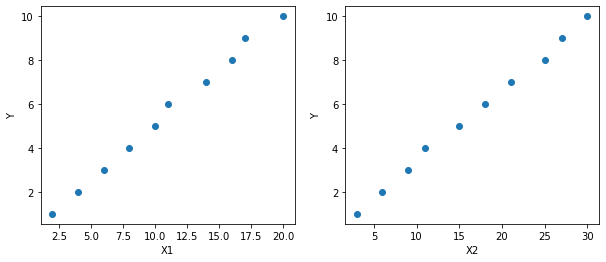

In [3]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.scatter(data=df, x="X1", y="Y")
plt.xlabel("X1")
plt.ylabel("Y")
plt.subplot(1, 2, 2)
plt.scatter(data=df, x="X2", y="Y")
plt.xlabel("X2")
plt.ylabel("Y")

In [4]:
df2 = pd.DataFrame({"X1" : [1, 2, 3, 4, 5, 5, 7, 9, 9, 10], 
                   "X2" : [3, 2, 4, 9, 5, 9, 8, 2, 4, 3],
                   "X3" : [4, 8, 2, 2, 5, 6, 6, 4, 9, 1]})
corr = round(df2.corr(), 2)
corr

,X1,X2,X3
X1,1.00,-0.06,-0.01
X2,-0.06,1.00,-0.04
X3,-0.01,-0.04,1.00


Text(0.5, 0.5, 'X3')

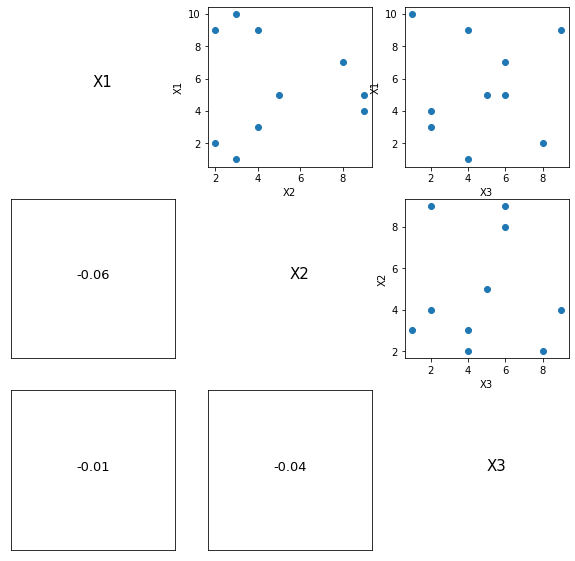

In [5]:
plt.figure(figsize=(10,10))

plt.subplot(3, 3, 1)
plt.axis("off")
plt.text(x = 0.5, y=.5, s="X1", fontsize=15)

plt.subplot(3, 3, 2)
plt.scatter(data=df2, x="X2", y="X1")
plt.xlabel("X2")
plt.ylabel("X1")

plt.subplot(3, 3, 3)
plt.scatter(data=df2, x="X3", y="X1")
plt.xlabel("X3")
plt.ylabel("X1")

plt.subplot(3, 3, 4)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.text(x = 0.4, y=.5, s=corr.iloc[0, 1], fontsize=13)

plt.subplot(3, 3, 5)
plt.axis("off")
plt.text(x = 0.5, y=.5, s="X2", fontsize=15)

plt.subplot(3, 3, 6)
plt.scatter(data=df2, x="X3", y="X2")
plt.xlabel("X3")
plt.ylabel("X2")

plt.subplot(3, 3, 7)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.text(x = 0.4, y=.5, s=corr.iloc[0, 2], fontsize=13)

plt.subplot(3, 3, 8)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.text(x = 0.4, y=.5, s=corr.iloc[1, 2], fontsize=13)

plt.subplot(3, 3, 9)
plt.axis("off")
plt.text(x = 0.5, y=.5, s="X3", fontsize=15)

In [53]:
np.random.seed(3)
x = np.random.rand(200)
y = x + 0.2 * np.random.randn(200)

In [54]:


target = x
x_data1 = y
x_data1_1 = sm.add_constant(x_data1, has_constant="add")
model1 = sm.OLS(target, x_data1_1)
fitted_model1 = model1.fit()
fitted_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     349.5
Date:                Tue, 25 May 2021   Prob (F-statistic):           1.30e-45
Time:                        14:46:33   Log-Likelihood:                 70.382
No. Observations:                 200   AIC:                            -136.8
Df Residuals:                     198   BIC:                            -130.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1829      0.021      8.819      0.000       0.142       0.224
x1             0.6184      0.033     18.696      0.000       0.553       0.684
==============================================================================
Omnibus:                        3.010   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.222   Jarque-Bera (JB):                2.117
Skew:                          -0.039   Prob(JB):                        0.347
Kurtosis:                       2.502   Cond. No.                         3.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# create instance of influence
influence = fitted_model1.get_influence()

# obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal

# DataFrame에 표준화 잔차 담기
resid = pd.DataFrame({'res' : standardized_residuals})
resid['idx'] = pd.DataFrame({i for i in range(0, len(standardized_residuals))})
resid['fitted'] = fitted_model1.predict(x_data1_1)

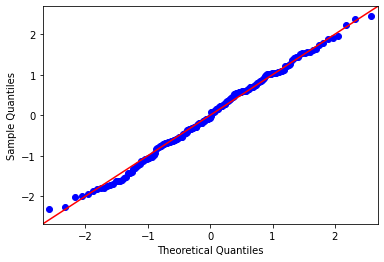

In [56]:
fig = sm.qqplot(resid['res'], fit=True, line='45')

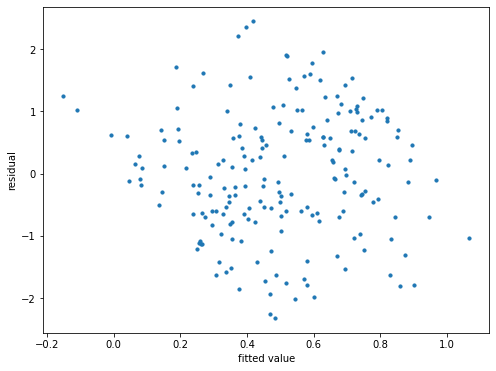

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(x = resid['fitted'], y=resid['res'], s=10)
plt.xlabel('fitted value')
plt.ylabel('residual')
plt.show()

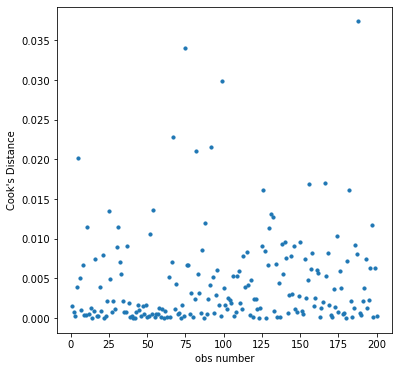

In [58]:
fig = plt.figure(figsize=(6,6))
idx = range(1,201)
cdis = influence.cooks_distance[0]
dfits = influence.dffits[0]
influential = pd.DataFrame({"Cook's Distance" : cdis, "DFITS" : dfits})
influential.describe()
plt.scatter(idx, influential["Cook's Distance"], s=10)
plt.xlabel('obs number')
plt.ylabel("Cook's Distance")
plt.show()